In [1]:
# R version 4.1.0 #
# Load packages: Seurat_4.1.1, RColorBrewer_1.1-3, ggplot2_3.3.6, extrafont_0.18, ggpubr_0.4.0

packages = c('Seurat','RColorBrewer','ggplot2','extrafont','ggpubr')
for (p in packages){
    suppressPackageStartupMessages(eval(bquote(library(.(p)))))
}



In [2]:
seurat_file = 'source_data/from_GEO/ds_seurat_PCA_UMAP_clusters_ds38_min10_v4.rds' # download from GEO; also saved in seurat_ds38_min10_v4.R
seurat_archive <- readRDS(seurat_file)


[1] "h1_42min_20211217"


[1] 0.0000000000 0.0002308936 0.0217039945 0.0020780420 0.0718078966
[6] 0.8263680443 0.0778111291 0.0000000000

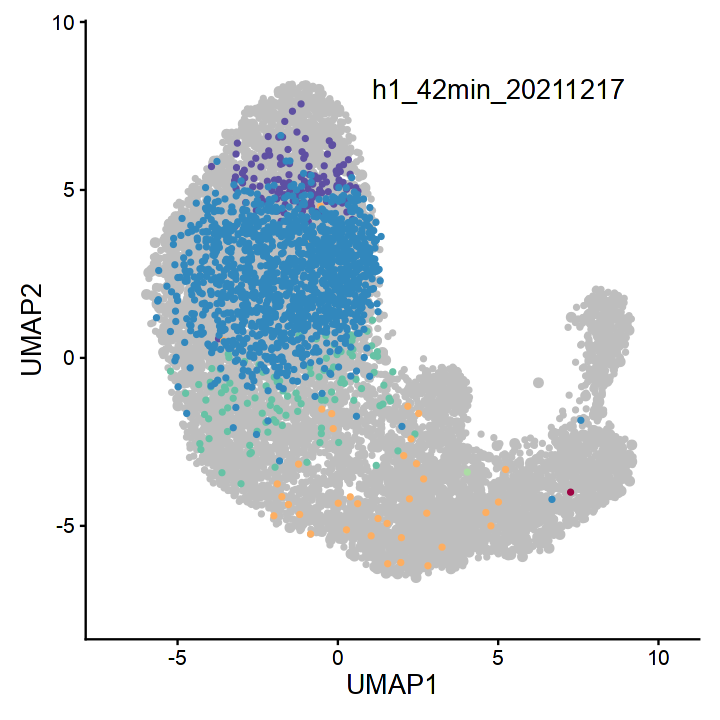

In [3]:
seurat <- seurat_archive

ids = 'h1_42min_20211217'
print(ids)

levels(seurat$seurat_clusters) = c(levels(seurat$seurat_clusters),'10')
seurat@active.ident = seurat$cell.type
sub_seurat=subset(seurat,idents=ids)
sub_seurat@active.ident = sub_seurat$seurat_clusters
prop.table(as.integer(table(sub_seurat$seurat_clusters)))
sub_seurat@active.ident <- sub_seurat$cell.type
seurat$seurat_clusters[!names(seurat$seurat_clusters) %in% names(sub_seurat$seurat_clusters)] = '10'

seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 1700
alpha = 1
pt.size = 2
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1

sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
seurat@active.ident <- seurat$seurat_clusters
sampled.cells <- c(sampled.cells,sample(x = names(subset(seurat,idents='10')$cell.type),size=10000,replace=FALSE))

alpha = c(0.1,1,1,1,1,1,1)
DimPlot(subset(seurat,cells=sampled.cells),pt.size=c(rep(2,n_cells_per),rep(1,10000)),order=rev(c('0','1','3','4','6','2','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Early Stationary","Early Lag","Late Lag","Late Exponential","Persister","Early Exponential"),values = alpha(c('gray',my_cols[c(1,7,8,10,4,9)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none') + 
    annotate("text",x=5, y=8, label=ids, size=16 / .pt, family="Arial")
filename = paste('figures/figED4_',ids,'.pdf',sep='')
ggsave(filename,width = 6, height = 6)


[1] "h2_42min_20211217"


[1] 0.0005437738 0.0000000000 0.0353452964 0.0021750952 0.0940728657
[6] 0.8015225666 0.0663404024 0.0000000000

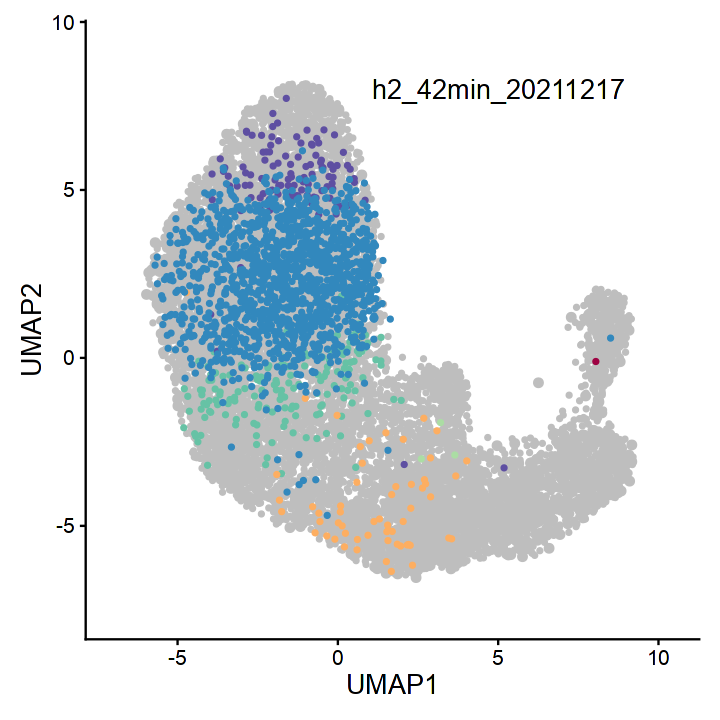

In [4]:
seurat <- seurat_archive

ids = 'h2_42min_20211217'
print(ids)

levels(seurat$seurat_clusters) = c(levels(seurat$seurat_clusters),'10')
seurat@active.ident = seurat$cell.type
sub_seurat=subset(seurat,idents=ids)
sub_seurat@active.ident = sub_seurat$seurat_clusters
prop.table(as.integer(table(sub_seurat$seurat_clusters)))
sub_seurat@active.ident <- sub_seurat$cell.type
seurat$seurat_clusters[!names(seurat$seurat_clusters) %in% names(sub_seurat$seurat_clusters)] = '10'

seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 1700
alpha = 1
pt.size = 2
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1

sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
seurat@active.ident <- seurat$seurat_clusters
sampled.cells <- c(sampled.cells,sample(x = names(subset(seurat,idents='10')$cell.type),size=10000,replace=FALSE))

alpha = c(0.1,1,1,1,1,1,1)
DimPlot(subset(seurat,cells=sampled.cells),pt.size=c(rep(2,n_cells_per),rep(1,10000)),order=rev(c('0','1','3','4','6','2','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Early Stationary","Early Lag","Late Lag","Late Exponential","Persister","Early Exponential"),values = alpha(c('gray',my_cols[c(1,7,8,10,4,9)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none') + 
    annotate("text",x=5, y=8, label=ids, size=16 / .pt, family="Arial")
filename = paste('figures/figED4_',ids,'.pdf',sep='')
ggsave(filename,width = 6, height = 6)


[1] "h3_50min_20211217"


[1] 0.0003302510 0.0004128137 0.0673712021 0.0013210040 0.0542437252
[6] 0.7780713342 0.0982496697 0.0000000000

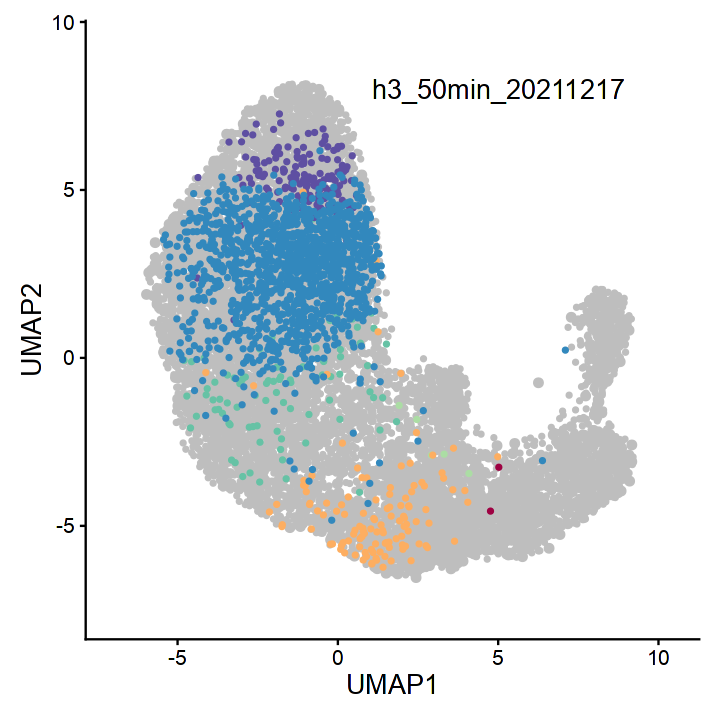

In [5]:
seurat <- seurat_archive

ids = 'h3_50min_20211217'
print(ids)

levels(seurat$seurat_clusters) = c(levels(seurat$seurat_clusters),'10')
seurat@active.ident = seurat$cell.type
sub_seurat=subset(seurat,idents=ids)
sub_seurat@active.ident = sub_seurat$seurat_clusters
prop.table(as.integer(table(sub_seurat$seurat_clusters)))
sub_seurat@active.ident <- sub_seurat$cell.type
seurat$seurat_clusters[!names(seurat$seurat_clusters) %in% names(sub_seurat$seurat_clusters)] = '10'

seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 1700
alpha = 1
pt.size = 2
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1

sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
seurat@active.ident <- seurat$seurat_clusters
sampled.cells <- c(sampled.cells,sample(x = names(subset(seurat,idents='10')$cell.type),size=10000,replace=FALSE))

alpha = c(0.1,1,1,1,1,1,1)
DimPlot(subset(seurat,cells=sampled.cells),pt.size=c(rep(2,n_cells_per),rep(1,10000)),order=rev(c('0','1','3','4','6','2','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Early Stationary","Early Lag","Late Lag","Late Exponential","Persister","Early Exponential"),values = alpha(c('gray',my_cols[c(1,7,8,10,4,9)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none') + 
    annotate("text",x=5, y=8, label=ids, size=16 / .pt, family="Arial")
filename = paste('figures/figED4_',ids,'.pdf',sep='')
ggsave(filename,width = 6, height = 6)


[1] "t4_1hr_WT_20210722"


[1] 0.0003757986 0.0000000000 0.0157835400 0.0007515971 0.0507328072
[6] 0.8635851184 0.0687711387 0.0000000000

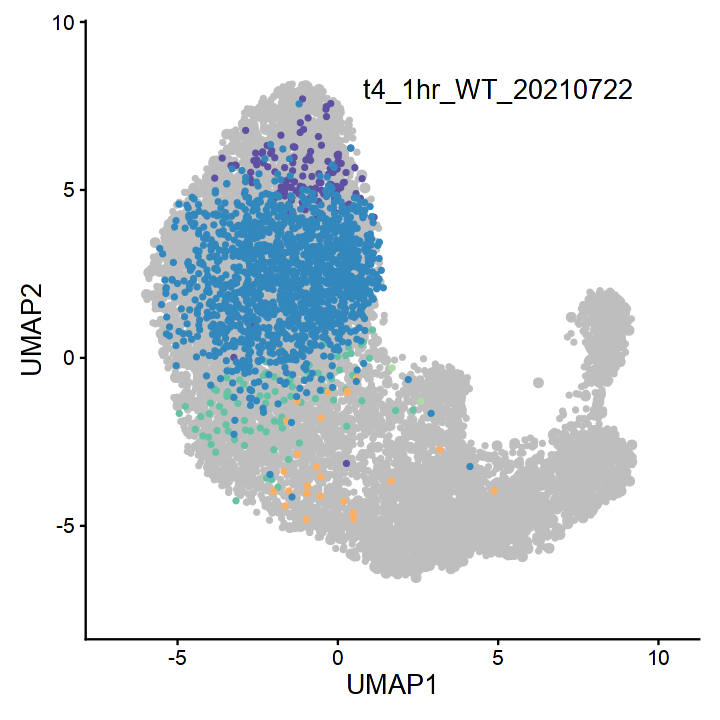

In [6]:
seurat <- seurat_archive

ids = 't4_1hr_WT_20210722'
print(ids)

levels(seurat$seurat_clusters) = c(levels(seurat$seurat_clusters),'10')
seurat@active.ident = seurat$cell.type
sub_seurat=subset(seurat,idents=ids)
sub_seurat@active.ident = sub_seurat$seurat_clusters
prop.table(as.integer(table(sub_seurat$seurat_clusters)))
sub_seurat@active.ident <- sub_seurat$cell.type
seurat$seurat_clusters[!names(seurat$seurat_clusters) %in% names(sub_seurat$seurat_clusters)] = '10'

seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 1700
alpha = 1
pt.size = 2
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1

sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
seurat@active.ident <- seurat$seurat_clusters
sampled.cells <- c(sampled.cells,sample(x = names(subset(seurat,idents='10')$cell.type),size=10000,replace=FALSE))

alpha = c(0.1,1,1,1,1,1)
DimPlot(subset(seurat,cells=sampled.cells),pt.size=c(rep(2,n_cells_per),rep(1,10000)),order=rev(c('0','3','4','6','2','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Early Lag","Late Lag","Late Exponential","Persister","Early Exponential"),values = alpha(c('gray',my_cols[c(7,8,10,4,9)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none') + 
    annotate("text",x=5, y=8, label=ids, size=16 / .pt, family="Arial")
filename = paste('figures/figED4_',ids,'.pdf',sep='')
ggsave(filename,width = 6, height = 6)


[1] "WT_1hr_20220331"


[1] 0.0002801644 0.0005603287 0.0080313784 0.0003735525 0.0289503175
[6] 0.8317146059 0.1300896526 0.0000000000

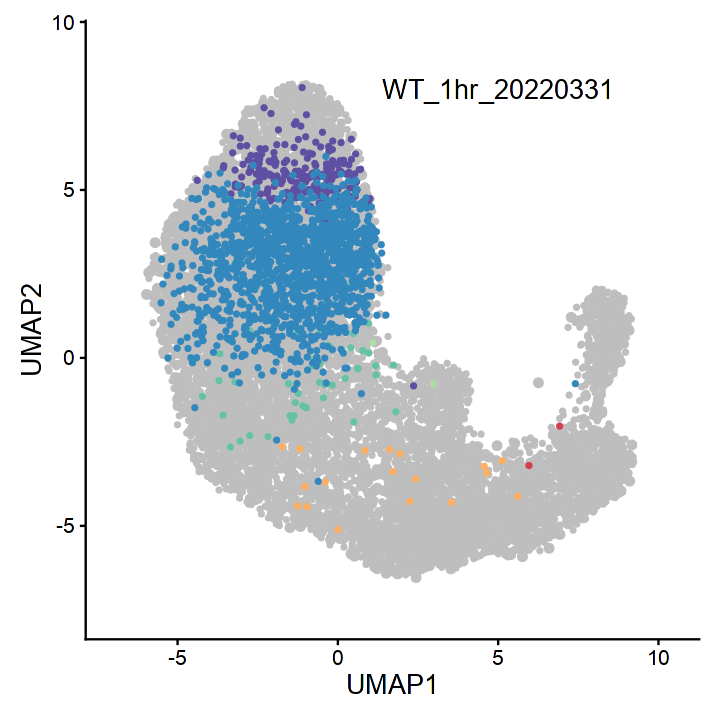

In [7]:
seurat <- seurat_archive

ids = 'WT_1hr_20220331'
print(ids)

levels(seurat$seurat_clusters) = c(levels(seurat$seurat_clusters),'10')
seurat@active.ident = seurat$cell.type
sub_seurat=subset(seurat,idents=ids)
sub_seurat@active.ident = sub_seurat$seurat_clusters
prop.table(as.integer(table(sub_seurat$seurat_clusters)))
sub_seurat@active.ident <- sub_seurat$cell.type
seurat$seurat_clusters[!names(seurat$seurat_clusters) %in% names(sub_seurat$seurat_clusters)] = '10'

seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 1700
alpha = 1
pt.size = 2
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1

sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
seurat@active.ident <- seurat$seurat_clusters
sampled.cells <- c(sampled.cells,sample(x = names(subset(seurat,idents='10')$cell.type),size=10000,replace=FALSE))

alpha = c(0.1,1,1,1,1,1,1,1)
DimPlot(subset(seurat,cells=sampled.cells),pt.size=c(rep(2,n_cells_per),rep(1,10000)),order=rev(c('0','1','3','4','6','2','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Early Stationary","Stationary","Early Lag","Late Lag","Late Exponential","Persister","Early Exponential"),values = alpha(c('gray',my_cols[c(1,2,7,8,10,4,9)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none') + 
    annotate("text",x=5, y=8, label=ids, size=16 / .pt, family="Arial")
filename = paste('figures/figED4_',ids,'.pdf',sep='')
ggsave(filename,width = 6, height = 6)


[1] "WT_42min_20211217"


[1] 0.000000000 0.000000000 0.006051437 0.001512859 0.062027231 0.859808371
[7] 0.070600101 0.000000000

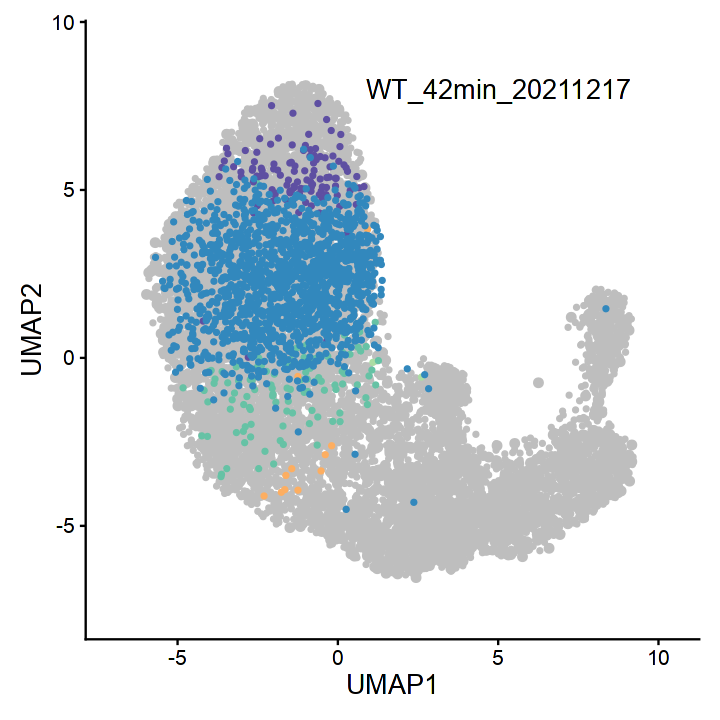

In [8]:
seurat <- seurat_archive

ids = 'WT_42min_20211217'
print(ids)

levels(seurat$seurat_clusters) = c(levels(seurat$seurat_clusters),'10')
seurat@active.ident = seurat$cell.type
sub_seurat=subset(seurat,idents=ids)
sub_seurat@active.ident = sub_seurat$seurat_clusters
prop.table(as.integer(table(sub_seurat$seurat_clusters)))
sub_seurat@active.ident <- sub_seurat$cell.type
seurat$seurat_clusters[!names(seurat$seurat_clusters) %in% names(sub_seurat$seurat_clusters)] = '10'

seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 1700
alpha = 1
pt.size = 2
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1

sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
seurat@active.ident <- seurat$seurat_clusters
sampled.cells <- c(sampled.cells,sample(x = names(subset(seurat,idents='10')$cell.type),size=10000,replace=FALSE))

alpha = c(0.1,1,1,1,1,1)
DimPlot(subset(seurat,cells=sampled.cells),pt.size=c(rep(2,n_cells_per),rep(1,10000)),order=rev(c('3','4','6','2','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Early Lag","Late Lag","Late Exponential","Persister","Early Exponential"),values = alpha(c('gray',my_cols[c(7,8,10,4,9)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none') + 
    annotate("text",x=5, y=8, label=ids, size=16 / .pt, family="Arial")
filename = paste('figures/figED4_',ids,'.pdf',sep='')
ggsave(filename,width = 6, height = 6)


[1] "d1_1hr_1_20220807"


[1] 0.0001300390 0.0001300390 0.0123537061 0.0007802341 0.0553966190
[6] 0.8898569571 0.0413524057 0.0000000000

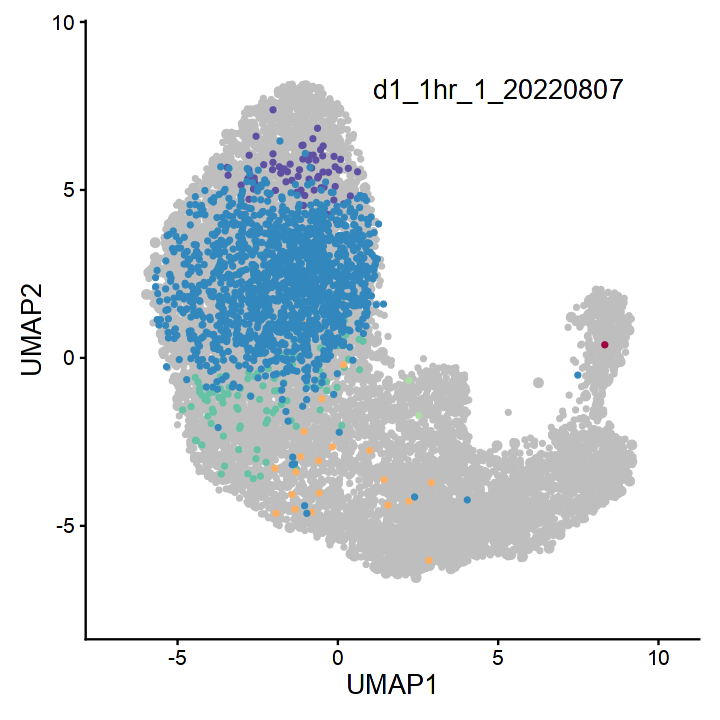

In [9]:
seurat <- seurat_archive

ids = 'd1_1hr_1_20220807'
print(ids)

levels(seurat$seurat_clusters) = c(levels(seurat$seurat_clusters),'10')
seurat@active.ident = seurat$cell.type
sub_seurat=subset(seurat,idents=ids)
sub_seurat@active.ident = sub_seurat$seurat_clusters
prop.table(as.integer(table(sub_seurat$seurat_clusters)))
sub_seurat@active.ident <- sub_seurat$cell.type
seurat$seurat_clusters[!names(seurat$seurat_clusters) %in% names(sub_seurat$seurat_clusters)] = '10'

seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 1700
alpha = 1
pt.size = 2
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1

sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
seurat@active.ident <- seurat$seurat_clusters
sampled.cells <- c(sampled.cells,sample(x = names(subset(seurat,idents='10')$cell.type),size=10000,replace=FALSE))

alpha = c(0.1,1,1,1,1,1,1)
DimPlot(subset(seurat,cells=sampled.cells),pt.size=c(rep(2,n_cells_per),rep(1,10000)),order=rev(c('0','1','3','4','6','2','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Early Stationary","Early Lag","Late Lag","Late Exponential","Persister","Early Exponential"),values = alpha(c('gray',my_cols[c(1,7,8,10,4,9)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none') + 
    annotate("text",x=5, y=8, label=ids, size=16 / .pt, family="Arial")
filename = paste('figures/figED4_',ids,'.pdf',sep='')
ggsave(filename,width = 6, height = 6)


[1] "WT_1hr_20220527"


[1] 0.0000000000 0.0001891432 0.0077548704 0.0003782864 0.0365046340
[6] 0.8339322867 0.1212407793 0.0000000000

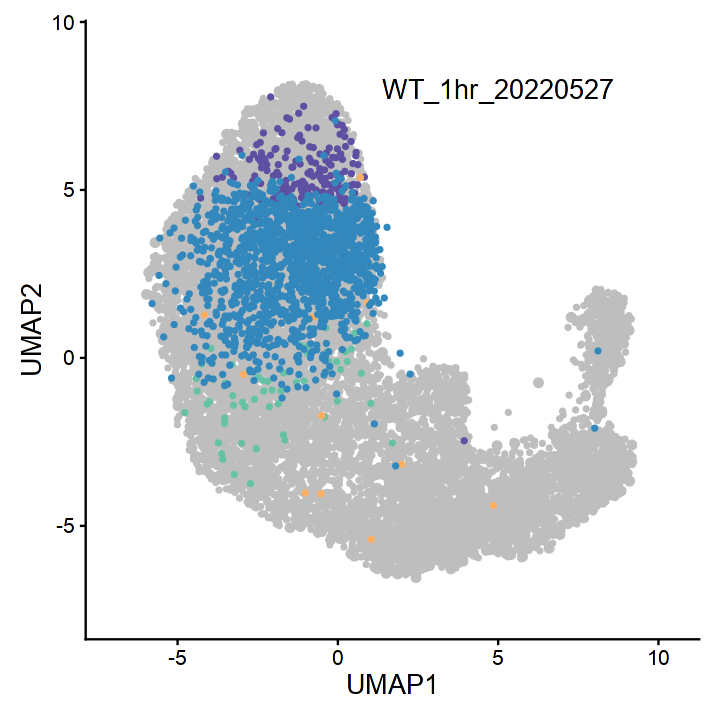

In [10]:
seurat <- seurat_archive

ids = 'WT_1hr_20220527'
print(ids)

levels(seurat$seurat_clusters) = c(levels(seurat$seurat_clusters),'10')
seurat@active.ident = seurat$cell.type
sub_seurat=subset(seurat,idents=ids)
sub_seurat@active.ident = sub_seurat$seurat_clusters
prop.table(as.integer(table(sub_seurat$seurat_clusters)))
sub_seurat@active.ident <- sub_seurat$cell.type
seurat$seurat_clusters[!names(seurat$seurat_clusters) %in% names(sub_seurat$seurat_clusters)] = '10'

seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 1700
alpha = 1
pt.size = 2
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1

sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
seurat@active.ident <- seurat$seurat_clusters
sampled.cells <- c(sampled.cells,sample(x = names(subset(seurat,idents='10')$cell.type),size=10000,replace=FALSE))

alpha = c(0.1,1,1,1,1)
DimPlot(subset(seurat,cells=sampled.cells),pt.size=c(rep(2,n_cells_per),rep(1,10000)),order=rev(c('0','1','3','4','6','2','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Late Lag","Late Exponential","Persister","Early Exponential"),values = alpha(c('gray',my_cols[c(8,10,4,9)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none') + 
    annotate("text",x=5, y=8, label=ids, size=16 / .pt, family="Arial")
filename = paste('figures/figED4_',ids,'.pdf',sep='')
ggsave(filename,width = 6, height = 6)


[1] "tet2_20211014"


[1] 0.000000000 0.000000000 0.014038372 0.001403837 0.046794572 0.854468882
[7] 0.083294338 0.000000000

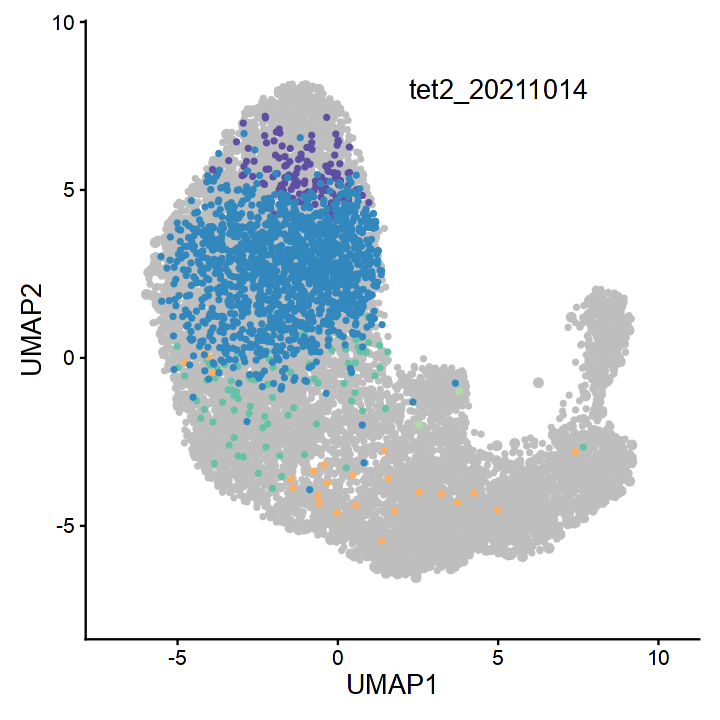

In [11]:
seurat <- seurat_archive

ids = 'tet2_20211014'
print(ids)

levels(seurat$seurat_clusters) = c(levels(seurat$seurat_clusters),'10')
seurat@active.ident = seurat$cell.type
sub_seurat=subset(seurat,idents=ids)
sub_seurat@active.ident = sub_seurat$seurat_clusters
prop.table(as.integer(table(sub_seurat$seurat_clusters)))
sub_seurat@active.ident <- sub_seurat$cell.type
seurat$seurat_clusters[!names(seurat$seurat_clusters) %in% names(sub_seurat$seurat_clusters)] = '10'

seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 1700
alpha = 1
pt.size = 2
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1

sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
seurat@active.ident <- seurat$seurat_clusters
sampled.cells <- c(sampled.cells,sample(x = names(subset(seurat,idents='10')$cell.type),size=10000,replace=FALSE))

alpha = c(0.1,1,1,1,1,1)
DimPlot(subset(seurat,cells=sampled.cells),pt.size=c(rep(2,n_cells_per),rep(1,10000)),order=rev(c('0','1','3','4','6','2','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Early Lag","Late Lag","Late Exponential","Persister","Early Exponential"),values = alpha(c('gray',my_cols[c(7,8,10,4,9)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none') + 
    annotate("text",x=5, y=8, label=ids, size=16 / .pt, family="Arial")
filename = paste('figures/figED4_',ids,'.pdf',sep='')
ggsave(filename,width = 6, height = 6)


[1] "wt_1hr_20231016"


[1] 0.0000000000 0.0003067798 0.0194293895 0.0010225994 0.0364045403
[6] 0.8763677268 0.0664689641 0.0000000000

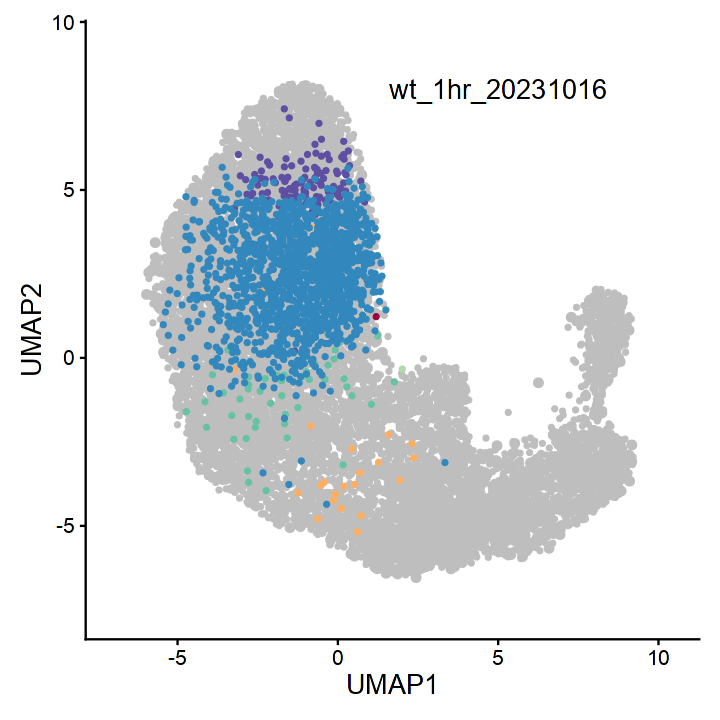

In [12]:
seurat <- seurat_archive

ids = 'wt_1hr_20231016'
print(ids)

levels(seurat$seurat_clusters) = c(levels(seurat$seurat_clusters),'10')
seurat@active.ident = seurat$cell.type
sub_seurat=subset(seurat,idents=ids)
sub_seurat@active.ident = sub_seurat$seurat_clusters
prop.table(as.integer(table(sub_seurat$seurat_clusters)))
sub_seurat@active.ident <- sub_seurat$cell.type
seurat$seurat_clusters[!names(seurat$seurat_clusters) %in% names(sub_seurat$seurat_clusters)] = '10'

seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 1700
alpha = 1
pt.size = 2
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1

sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
seurat@active.ident <- seurat$seurat_clusters
sampled.cells <- c(sampled.cells,sample(x = names(subset(seurat,idents='10')$cell.type),size=10000,replace=FALSE))

alpha = c(0.1,1,1,1,1,1,1)
DimPlot(subset(seurat,cells=sampled.cells),pt.size=c(rep(2,n_cells_per),rep(1,10000)),order=rev(c('0','1','3','4','6','2','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Stationary","Early Lag","Late Lag","Late Exponential","Persister","Early Exponential"),values = alpha(c('gray',my_cols[c(1,7,8,10,4,9)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none') + 
    annotate("text",x=5, y=8, label=ids, size=16 / .pt, family="Arial")
filename = paste('figures/figED4_',ids,'.pdf',sep='')
ggsave(filename,width = 6, height = 6)


[1] "d6_1hr_1_20220422"


[1] 0.0002444789 0.0019558308 0.0869529786 0.0227365333 0.2303805721
[6] 0.6389862277 0.0187433787 0.0000000000

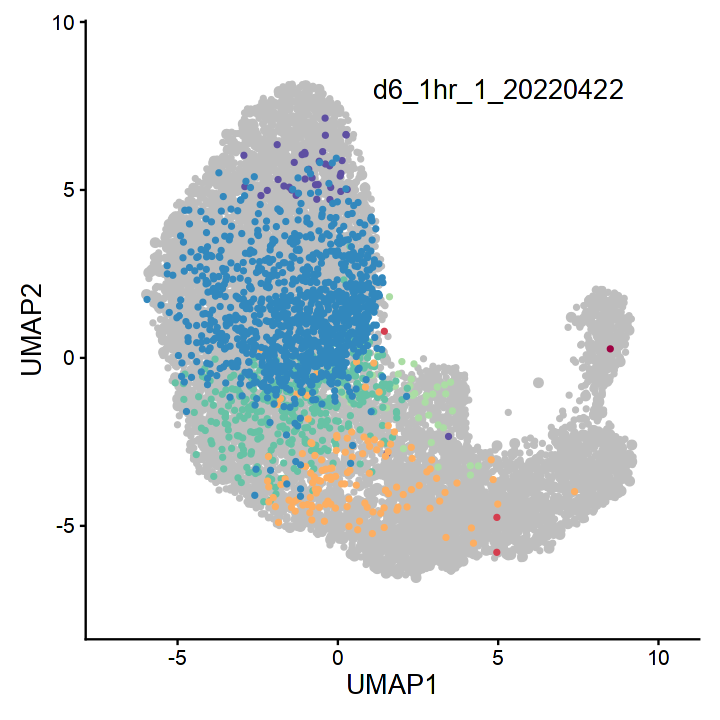

In [13]:
seurat <- seurat_archive

ids = 'd6_1hr_1_20220422'
print(ids)

levels(seurat$seurat_clusters) = c(levels(seurat$seurat_clusters),'10')
seurat@active.ident = seurat$cell.type
sub_seurat=subset(seurat,idents=ids)
sub_seurat@active.ident = sub_seurat$seurat_clusters
prop.table(as.integer(table(sub_seurat$seurat_clusters)))
sub_seurat@active.ident <- sub_seurat$cell.type
seurat$seurat_clusters[!names(seurat$seurat_clusters) %in% names(sub_seurat$seurat_clusters)] = '10'

seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 1700
alpha = 1
pt.size = 2
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1

sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
seurat@active.ident <- seurat$seurat_clusters
sampled.cells <- c(sampled.cells,sample(x = names(subset(seurat,idents='10')$cell.type),size=10000,replace=FALSE))

alpha = c(0.1,1,1,1,1,1,1,1)
DimPlot(subset(seurat,cells=sampled.cells),pt.size=c(rep(2,n_cells_per),rep(1,10000)),order=rev(c('0','1','3','4','6','2','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Early Stationary","Stationary","Early Lag","Late Lag","Late Exponential","Persister","Early Exponential"),values = alpha(c('gray',my_cols[c(1,2,7,8,10,4,9)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none') + 
    annotate("text",x=5, y=8, label=ids, size=16 / .pt, family="Arial")
filename = paste('figures/figED4_',ids,'.pdf',sep='')
ggsave(filename,width = 6, height = 6)


[1] "d6_1hr_2_20220422"


[1] 0.0003891353 0.0024904662 0.0613277298 0.0109736166 0.2134796482
[6] 0.6897034789 0.0216359250 0.0000000000

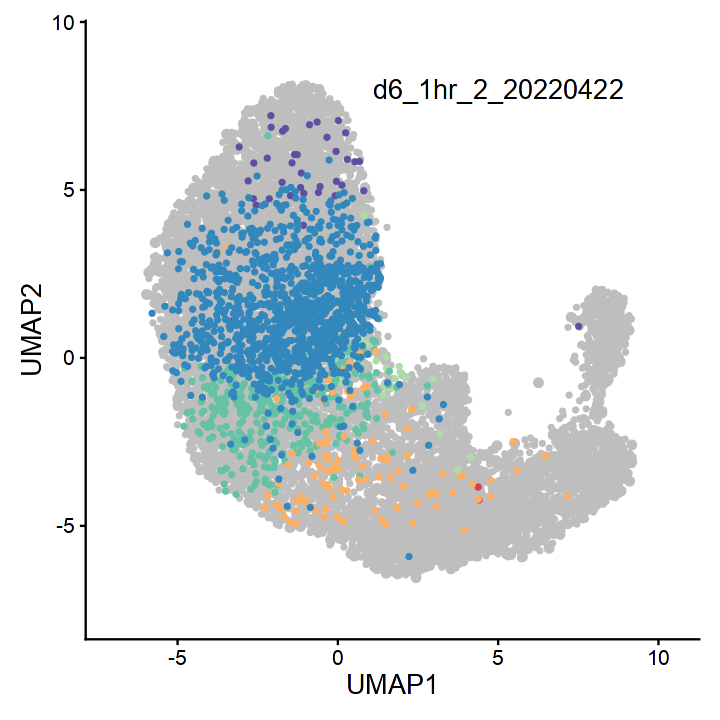

In [14]:
seurat <- seurat_archive

ids = 'd6_1hr_2_20220422'
print(ids)

levels(seurat$seurat_clusters) = c(levels(seurat$seurat_clusters),'10')
seurat@active.ident = seurat$cell.type
sub_seurat=subset(seurat,idents=ids)
sub_seurat@active.ident = sub_seurat$seurat_clusters
prop.table(as.integer(table(sub_seurat$seurat_clusters)))
sub_seurat@active.ident <- sub_seurat$cell.type
seurat$seurat_clusters[!names(seurat$seurat_clusters) %in% names(sub_seurat$seurat_clusters)] = '10'

seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 1700
alpha = 1
pt.size = 2
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1

sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
seurat@active.ident <- seurat$seurat_clusters
sampled.cells <- c(sampled.cells,sample(x = names(subset(seurat,idents='10')$cell.type),size=10000,replace=FALSE))

alpha = c(0.1,1,1,1,1,1,1)
DimPlot(subset(seurat,cells=sampled.cells),pt.size=c(rep(2,n_cells_per),rep(1,10000)),order=rev(c('0','1','3','4','6','2','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Stationary","Early Lag","Late Lag","Late Exponential","Persister","Early Exponential"),values = alpha(c('gray',my_cols[c(2,7,8,10,4,9)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none') + 
    annotate("text",x=5, y=8, label=ids, size=16 / .pt, family="Arial")
filename = paste('figures/figED4_',ids,'.pdf',sep='')
ggsave(filename,width = 6, height = 6)


[1] "tet1_20211014"


[1] 0.00000000 0.00000000 0.77017937 0.01681614 0.19674888 0.01625561 0.00000000
[8] 0.00000000

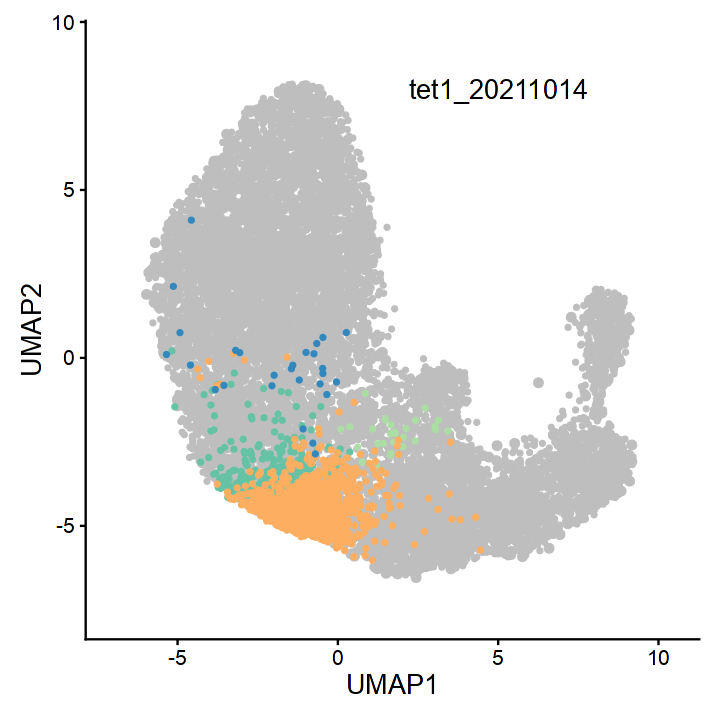

In [15]:
seurat <- seurat_archive

ids = 'tet1_20211014'
print(ids)

levels(seurat$seurat_clusters) = c(levels(seurat$seurat_clusters),'10')
seurat@active.ident = seurat$cell.type
sub_seurat=subset(seurat,idents=ids)
sub_seurat@active.ident = sub_seurat$seurat_clusters
prop.table(as.integer(table(sub_seurat$seurat_clusters)))
sub_seurat@active.ident <- sub_seurat$cell.type
seurat$seurat_clusters[!names(seurat$seurat_clusters) %in% names(sub_seurat$seurat_clusters)] = '10'

seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 1700
alpha = 1
pt.size = 2
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1

sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
seurat@active.ident <- seurat$seurat_clusters
sampled.cells <- c(sampled.cells,sample(x = names(subset(seurat,idents='10')$cell.type),size=10000,replace=FALSE))

alpha = c(0.1,1,1,1,1)
DimPlot(subset(seurat,cells=sampled.cells),pt.size=c(rep(2,n_cells_per),rep(1,10000)),order=rev(c('0','1','3','4','6','2','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Early Lag","Late Lag","Persister","Early Exponential"),values = alpha(c('gray',my_cols[c(7,8,4,9)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none') + 
    annotate("text",x=5, y=8, label=ids, size=16 / .pt, family="Arial")
filename = paste('figures/figED4_',ids,'.pdf',sep='')
ggsave(filename,width = 6, height = 6)


[1] "tet5_20211014"


[1] 0.0000000000 0.0009289364 0.8007431491 0.0938225732 0.0887134231
[6] 0.0153274501 0.0004644682 0.0000000000

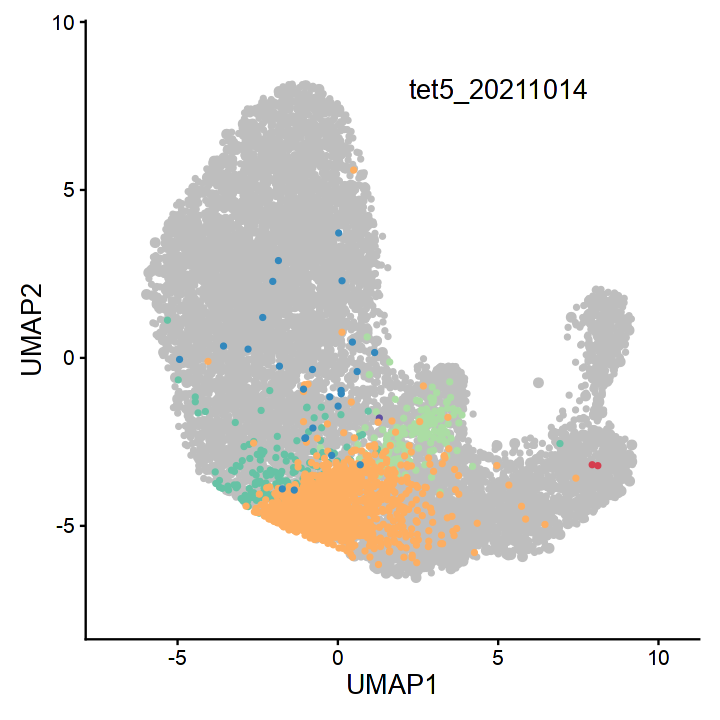

In [16]:
seurat <- seurat_archive

ids = 'tet5_20211014'
print(ids)

levels(seurat$seurat_clusters) = c(levels(seurat$seurat_clusters),'10')
seurat@active.ident = seurat$cell.type
sub_seurat=subset(seurat,idents=ids)
sub_seurat@active.ident = sub_seurat$seurat_clusters
prop.table(as.integer(table(sub_seurat$seurat_clusters)))
sub_seurat@active.ident <- sub_seurat$cell.type
seurat$seurat_clusters[!names(seurat$seurat_clusters) %in% names(sub_seurat$seurat_clusters)] = '10'

seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 1700
alpha = 1
pt.size = 2
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1

sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
seurat@active.ident <- seurat$seurat_clusters
sampled.cells <- c(sampled.cells,sample(x = names(subset(seurat,idents='10')$cell.type),size=10000,replace=FALSE))

alpha = c(0.1,1,1,1,1,1,1)
DimPlot(subset(seurat,cells=sampled.cells),pt.size=c(rep(2,n_cells_per),rep(1,10000)),order=rev(c('0','1','3','4','6','2','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Stationary","Early Lag","Late Lag","Late Exponential","Persister","Early Exponential"),values = alpha(c('gray',my_cols[c(2,7,8,10,4,9)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none') + 
    annotate("text",x=5, y=8, label=ids, size=16 / .pt, family="Arial")
filename = paste('figures/figED4_',ids,'.pdf',sep='')
ggsave(filename,width = 6, height = 6)


[1] "tet1hr_20230919"


[1] 0.0000000000 0.0019361084 0.7153920620 0.0527589545 0.2052274927
[6] 0.0242013553 0.0004840271 0.0000000000

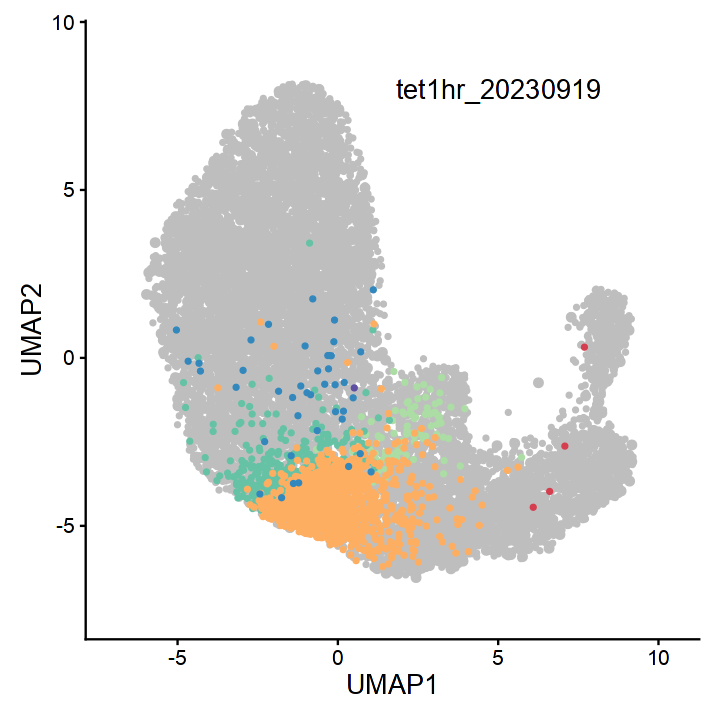

In [17]:
seurat <- seurat_archive

ids = 'tet1hr_20230919'
print(ids)

levels(seurat$seurat_clusters) = c(levels(seurat$seurat_clusters),'10')
seurat@active.ident = seurat$cell.type
sub_seurat=subset(seurat,idents=ids)
sub_seurat@active.ident = sub_seurat$seurat_clusters
prop.table(as.integer(table(sub_seurat$seurat_clusters)))
sub_seurat@active.ident <- sub_seurat$cell.type
seurat$seurat_clusters[!names(seurat$seurat_clusters) %in% names(sub_seurat$seurat_clusters)] = '10'

seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 1700
alpha = 1
pt.size = 2
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1

sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
seurat@active.ident <- seurat$seurat_clusters
sampled.cells <- c(sampled.cells,sample(x = names(subset(seurat,idents='10')$cell.type),size=10000,replace=FALSE))

alpha = c(0.1,1,1,1,1,1,1)
DimPlot(subset(seurat,cells=sampled.cells),pt.size=c(rep(2,n_cells_per),rep(1,10000)),order=rev(c('0','1','3','4','6','2','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Stationary","Early Lag","Late Lag","Late Exponential","Persister","Early Exponential"),values = alpha(c('gray',my_cols[c(2,7,8,10,4,9)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none') + 
    annotate("text",x=5, y=8, label=ids, size=16 / .pt, family="Arial")
filename = paste('figures/figED4_',ids,'.pdf',sep='')
ggsave(filename,width = 6, height = 6)


[1] "metG1_20200926"


[1] 0.0004586104 0.0270580142 0.7436367806 0.0417335474 0.0398991057
[6] 0.1368952075 0.0103187342 0.0000000000

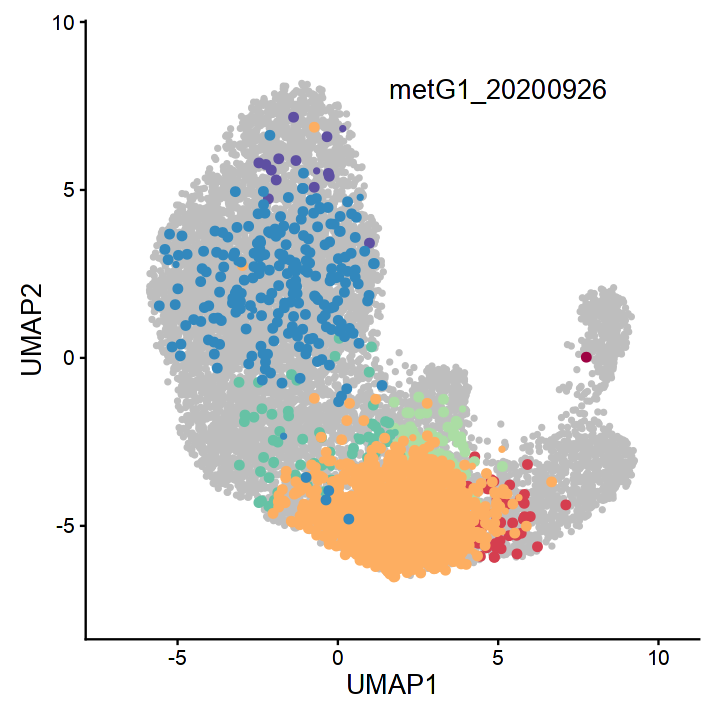

In [18]:
seurat <- seurat_archive

ids = 'metG1_20200926'
print(ids)

levels(seurat$seurat_clusters) = c(levels(seurat$seurat_clusters),'10')
seurat@active.ident = seurat$cell.type
sub_seurat=subset(seurat,idents=ids)
sub_seurat@active.ident = sub_seurat$seurat_clusters
prop.table(as.integer(table(sub_seurat$seurat_clusters)))
sub_seurat@active.ident <- sub_seurat$cell.type
seurat$seurat_clusters[!names(seurat$seurat_clusters) %in% names(sub_seurat$seurat_clusters)] = '10'

seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 1700
alpha = 1
pt.size = 2
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1

sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
seurat@active.ident <- seurat$seurat_clusters
sampled.cells <- c(sampled.cells,sample(x = names(subset(seurat,idents='10')$cell.type),size=10000,replace=FALSE))

alpha = c(0.1,1,1,1,1,1,1,1)
DimPlot(subset(seurat,cells=sampled.cells),pt.size=c(rep(2,n_cells_per),rep(1,10000)),order=rev(c('0','1','3','4','6','2','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Early Stationary","Stationary","Early Lag","Late Lag","Late Exponential","Persister","Early Exponential"),values = alpha(c('gray',my_cols[c(1,2,7,8,10,4,9)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none') + 
    annotate("text",x=5, y=8, label=ids, size=16 / .pt, family="Arial")
filename = paste('figures/figED4_',ids,'.pdf',sep='')
ggsave(filename,width = 6, height = 6)


[1] "metG5_20201018_1"


[1] 0.0003784295 0.0392620624 0.8460737938 0.0775780511 0.0202459792
[6] 0.0155156102 0.0009460738 0.0000000000

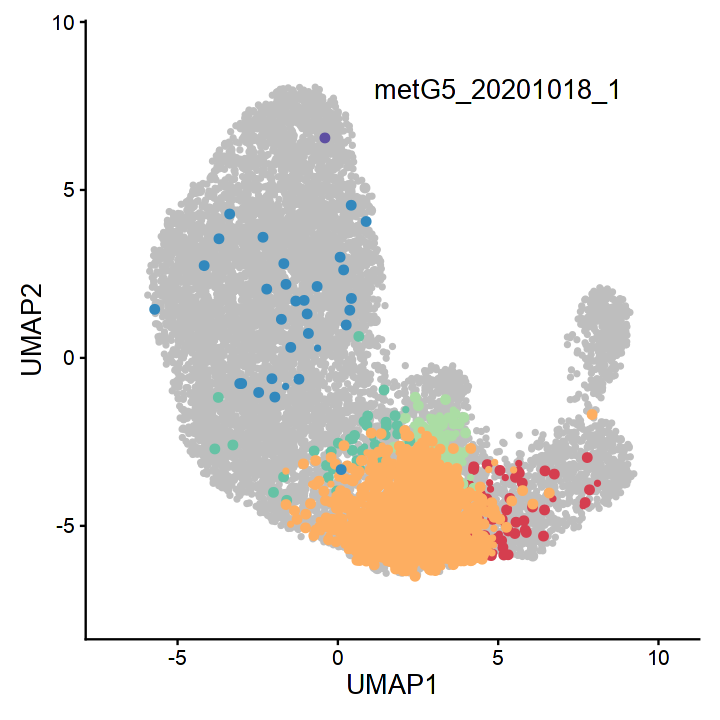

In [19]:
seurat <- seurat_archive

ids = 'metG5_20201018_1'
print(ids)

levels(seurat$seurat_clusters) = c(levels(seurat$seurat_clusters),'10')
seurat@active.ident = seurat$cell.type
sub_seurat=subset(seurat,idents=ids)
sub_seurat@active.ident = sub_seurat$seurat_clusters
prop.table(as.integer(table(sub_seurat$seurat_clusters)))
sub_seurat@active.ident <- sub_seurat$cell.type
seurat$seurat_clusters[!names(seurat$seurat_clusters) %in% names(sub_seurat$seurat_clusters)] = '10'

seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 1700
alpha = 1
pt.size = 2
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1

sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
seurat@active.ident <- seurat$seurat_clusters
sampled.cells <- c(sampled.cells,sample(x = names(subset(seurat,idents='10')$cell.type),size=10000,replace=FALSE))

alpha = c(0.1,1,1,1,1,1,1)
DimPlot(subset(seurat,cells=sampled.cells),pt.size=c(rep(2,n_cells_per),rep(1,10000)),order=rev(c('0','1','3','4','6','2','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Stationary","Early Lag","Late Lag","Late Exponential","Persister","Early Exponential"),values = alpha(c('gray',my_cols[c(2,7,8,10,4,9)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none') + 
    annotate("text",x=5, y=8, label=ids, size=16 / .pt, family="Arial")
filename = paste('figures/figED4_',ids,'.pdf',sep='')
ggsave(filename,width = 6, height = 6)


[1] "metG_52min_20211217"


[1] 0.000000000 0.004968944 0.954037267 0.019875776 0.018633540 0.002484472
[7] 0.000000000 0.000000000

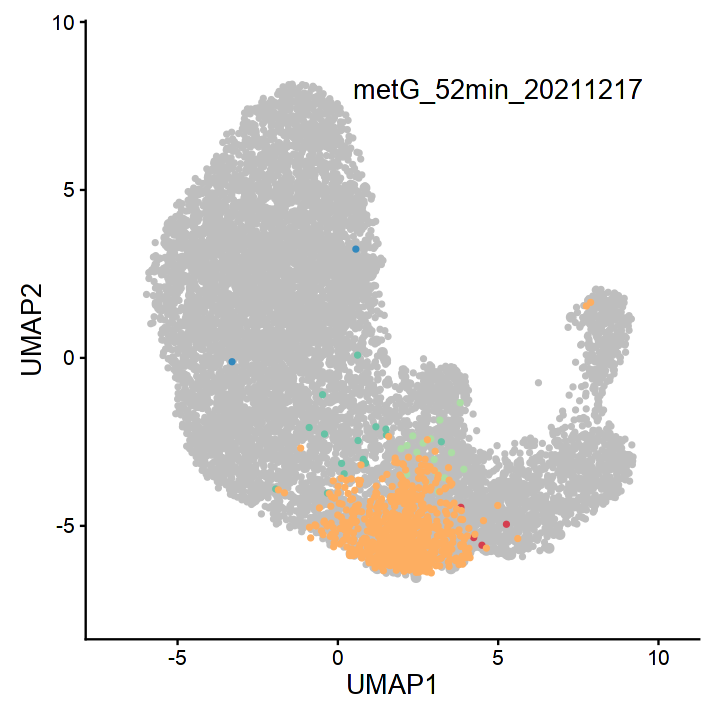

In [20]:
seurat <- seurat_archive

ids = 'metG_52min_20211217'
print(ids)

levels(seurat$seurat_clusters) = c(levels(seurat$seurat_clusters),'10')
seurat@active.ident = seurat$cell.type
sub_seurat=subset(seurat,idents=ids)
sub_seurat@active.ident = sub_seurat$seurat_clusters
prop.table(as.integer(table(sub_seurat$seurat_clusters)))
sub_seurat@active.ident <- sub_seurat$cell.type
seurat$seurat_clusters[!names(seurat$seurat_clusters) %in% names(sub_seurat$seurat_clusters)] = '10'

seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 805
alpha = 1
pt.size = 2
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1

sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
seurat@active.ident <- seurat$seurat_clusters
sampled.cells <- c(sampled.cells,sample(x = names(subset(seurat,idents='10')$cell.type),size=10000,replace=FALSE))

alpha = c(0.1,1,1,1,1,1)
DimPlot(subset(seurat,cells=sampled.cells),pt.size=c(rep(2,n_cells_per),rep(1,10000)),order=rev(c('0','1','3','4','6','2','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Stationary","Early Lag","Late Lag","Persister","Early Exponential"),values = alpha(c('gray',my_cols[c(2,7,8,4,9)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none') + 
    annotate("text",x=5, y=8, label=ids, size=16 / .pt, family="Arial")
filename = paste('figures/figED4_',ids,'.pdf',sep='')
ggsave(filename,width = 6, height = 6)
